In [23]:
import sklearn
from efficientnet.keras import preprocess_input
import os
import librosa
import librosa.display
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import ModelCheckpoint
from datetime import datetime 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.python.keras.optimizers import adam_v2
from sklearn import metrics
from tensorflow.python.keras.callbacks import ModelCheckpoint
from datetime import datetime 


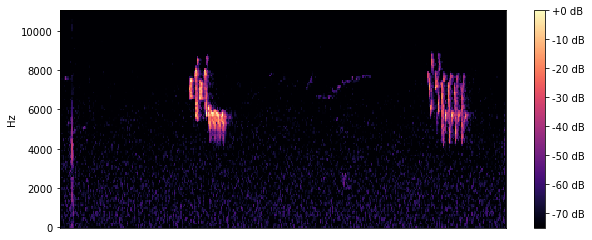

(40, 712) [[-5.3813568e+02 -4.7246237e+02 -4.6525201e+02 ... -4.2365070e+02
  -5.0174219e+02 -6.8936334e+02]
 [ 8.1347122e+01  8.0291092e+01  7.5563538e+01 ...  9.1492004e+01
   8.8755539e+01  7.7048462e+01]
 [ 2.0220749e+01  2.1087244e+01  2.1493532e+01 ...  2.0459042e+01
   2.5270882e+01  2.8461693e+01]
 ...
 [ 2.5350165e-01 -2.2291660e-02  1.6310983e+00 ... -2.4891195e+00
  -4.7786951e+00 -5.1699805e+00]
 [ 4.8842573e-01 -4.8402983e-01  1.6491225e+00 ... -6.4792852e+00
  -5.8871951e+00 -3.3328013e+00]
 [ 4.1716261e+00  3.3933537e+00  2.3815510e+00 ... -7.2209382e-01
  -9.9127209e-01  7.9604278e+00]]


In [24]:
sound_dir="./Arunachal_Pradesh/grey-cheeked warbler/phylloscopus poliogenys0.wav"
signal, sr = librosa.load(sound_dir,duration=30) # sr = sampling rate
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
print(mfccs.shape,mfccs)

In [25]:
data_dir="./Arunachal_Pradesh/grey-cheeked warbler"
data_dir=os.path.join(os.path.abspath(data_dir))
audio_files=glob(data_dir+"/*.wav")
#print(len(audio_files))signal1,sr1=librosa.load(audio_files[0],duration=10)
#print(signal1)
data_dir1="./Arunachal_Pradesh/grey-sided laughingthrush"
audio_files1=glob(data_dir1+"/*.wav")
data_dir2="./Arunachal_Pradesh/himalayan cuckoo"
audio_files2=glob(data_dir2+"/*.wav")
data_dir3="./Arunachal_Pradesh/grey-winged blackbird"
audio_files3=glob(data_dir3+"/*.wav")
data_dir4="./Arunachal_Pradesh/indian spot-billed duck"
audio_files4=glob(data_dir4+"/*.wav")
data_dir5="./Arunachal_Pradesh/mountain scops owl"
audio_files5=glob(data_dir5+"/*.wav")
data_dir6="./Arunachal_Pradesh/mountain tailorbird"
audio_files6=glob(data_dir6+"/*.wav")
data_dir7="./Arunachal_Pradesh/pale blue flycatcher"
audio_files7=glob(data_dir7+"/*.wav")
data_dir8="./Arunachal_Pradesh/scaly laughingthrush"
audio_files8=glob(data_dir8+"/*.wav")
#print(len(audio_files8))

extracted_features=[]

In [26]:
def extract(file):
    audio, sample_rate = librosa.load(file) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    #print(mfccs_scaled_features)
    return mfccs_scaled_features

In [27]:
extracted_features=[]

for i in range(len(audio_files)):
    s=os.path.join(os.path.abspath(audio_files[i]))
    print(s)
    m=extract(s)

    extracted_features.append([m,"grey-cheeked warbler"])

for i in range(len(audio_files1)):
    s=os.path.join(os.path.abspath(audio_files1[i]))
    m1=extract(s)
    extracted_features.append([m1,"grey-sided laughingthrush"])
for i in range(len(audio_files2)):
    s=os.path.join(os.path.abspath(audio_files2[i]))
    m2=extract(s)
    extracted_features.append([m2,"himalayan cuckoo"])
for i in range(len(audio_files3)):
    s=os.path.join(os.path.abspath(audio_files3[i]))
    m3=extract(s)
    extracted_features.append([m3,"grey-winged blackbird"])
for i in range(len(audio_files4)):
    s=os.path.join(os.path.abspath(audio_files4[i]))
    m4=extract(s)
    extracted_features.append([m4,"indian spot-billed duck"])
for i in range(len(audio_files5)):
    s=os.path.join(os.path.abspath(audio_files5[i]))
    m5=extract(s)
    extracted_features.append([m5,"mountain scops owl"])
for i in range(len(audio_files6)):
    s=os.path.join(os.path.abspath(audio_files6[i]))
    m6=extract(s)
    extracted_features.append([m6,"mountain tailorbird"])
for i in range(len(audio_files7)):
    s=os.path.join(os.path.abspath(audio_files7[i]))
    m7=extract(s)
    extracted_features.append([m7,"pale blue flycatcher"])
for i in range(len(audio_files8)):
    s=os.path.join(os.path.abspath(audio_files8[i]))
    m8=extract(s)
    extracted_features.append([m8,"scaly laughingthrush"])


### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys0.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys1.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys10.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys11.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys12.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys13.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys14.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys15.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\phylloscopus poliogenys16.wav
C:\Users\Administrator\Downloads\Bird\A

C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching4.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching40.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching41.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching42.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching43.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching44.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching45.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching46.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching47.wav
C:\Users\Administrator\Downloads\Bird\Arunachal_Pradesh\grey-cheeked warbler\time-streching48.wav
C:\Users\Administrato

KeyboardInterrupt: 

In [ ]:
x=np.array(extracted_features_df["feature"].tolist())
y=np.array(extracted_features_df["class"].tolist())
x.shape

In [ ]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
y

In [ ]:
num_labels=y.shape[1]
#Dense()
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###third layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.1))
#fourth layer
model.add(Dense(600))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
num_epochs =220
num_batch_size =32

checkpointer = ModelCheckpoint(filepath='audio_classification.hdf5',
    verbose=1,
    save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])
#X_test[0]

In [ ]:
model.predict(X_test)

In [ ]:
filename="./Arunachal_Pradesh/indian spot-billed duck/pitch0.wav"
audio, sample_rate = librosa.load(filename,duration=5) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class


In [ ]:
class_names = ['grey-cheeked warbler', 'grey-sided laughingthrush','grey-winged blackbird','himalayan cuckoo','indian spot-billed duck','mountain scops owl','mountain tailorbird','pale blue flycatcher','scaly laughingthrush']

# Get the feature names
#feature_names = list(X_train.columns)
#print(x)
# Fit the Explainer on the training data set using the LimeTabularExplainer 

explainer = LimeTabularExplainer(x, feature_names = x, 
                                 class_names = class_names, mode = 'classification')

i = 10
 
# Number denoting the top features
k = 5
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
#print(x_test.values)
exp = explainer.explain_instance(x[10], model.predict, num_features = 8)
#exp.show_in_notebook(show_all=True)